In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import joblib

In [8]:
diabetesDF = pd.read_csv('diabetes.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

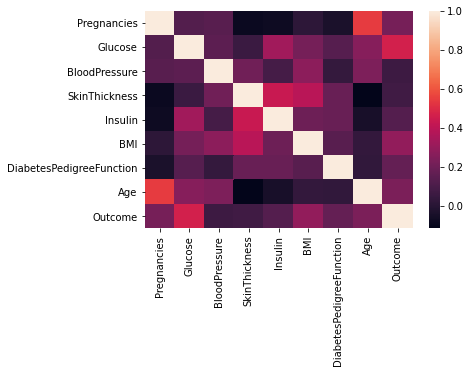

In [9]:
corr = diabetesDF.corr()
print(corr)
sns.heatmap(corr,    
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [10]:
dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [23]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
print(trainData)
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

[[6.00e+00 1.48e+02 7.20e+01 ... 3.36e+01 6.27e-01 5.00e+01]
 [1.00e+00 8.50e+01 6.60e+01 ... 2.66e+01 3.51e-01 3.10e+01]
 [8.00e+00 1.83e+02 6.40e+01 ... 2.33e+01 6.72e-01 3.20e+01]
 ...
 [0.00e+00 1.79e+02 5.00e+01 ... 3.78e+01 4.55e-01 2.20e+01]
 [1.10e+01 1.36e+02 8.40e+01 ... 2.83e+01 2.60e-01 4.20e+01]
 [0.00e+00 1.07e+02 6.00e+01 ... 2.64e+01 1.33e-01 2.30e+01]]


In [12]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

In [13]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [14]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


Text(0.5, 0, 'Importance')

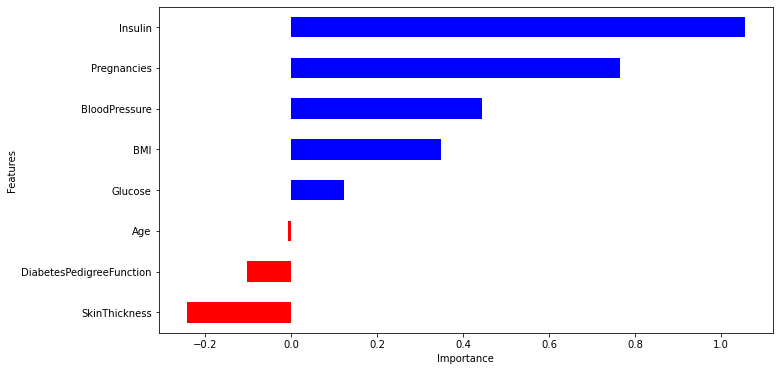

In [24]:
coeff = list(diabetesCheck.coef_[0])
df = pd.DataFrame(trainData, columns = ['BloodPressure','Insulin','SkinThickness','Age','DiabetesPedigreeFunction','Pregnancies','BMI','Glucose'])
labels = list(df.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [25]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [26]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  37.0 %


In [27]:
print(dfCheck.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome  
750                     1.182   22        1  
751                     0.261   28        0  
752                     0.223   25        0  
753                     0.222   26        1  
754                     0.443   45        1  


In [29]:
sampleData = dfCheck[:649]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]
 [0.7224006  0.2775994 ]
 [0.89838515 0.10161485]
 [0.32963847 0.67036153]
 [0.30136123 0.69863877]
 [0.55283136 0.44716864]
 [0.53844802 0.46155198]
 [0.70671619 0.29328381]
 [0.82807971 0.17192029]
 [0.12533573 0.87466427]
 [0.8974206  0.1025794 ]
 [0.06851434 0.93148566]
 [0.91171998 0.08828002]
 [0.69154162 0.30845838]
 [0.68231251 0.31768749]
 [0.83470698 0.16529302]
 [0.74308591 0.25691409]
 [0.92649981 0.07350019]]
prediction: [1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0]
